DATASET PATHS AND PARAMETERS

TRAINING DATASET PATHS AND PARAMETERS

In [ ]:
test_text_file_path = "/content/drive/MyDrive/NLPPROJECT/yelp_train_data.txt"
test_labels_file_path = "/content/drive/MyDrive/NLPPROJECT/yelp_train_labels.txt"
vocab_size = 9372
vocab_save_path = "/content/drive/MyDrive/NLPPROJECT/"
predefined_word_index = {
            "<pad>": 0,
            "<sos>": 1,
            "<unk>": 2,
        }
filter_sentiment_words = True
filter_stopwords = True
embedding_size = 300
word_embedding_text_file_path = "/content/drive/MyDrive/NLPPROJECT/embedding.txt"
word_embedding_path = "/content/drive/MyDrive/NLPPROJECT/word_embeddings.npy"
w2i_file_path = "/content/drive/MyDrive/NLPPROJECT/word2index.json"
bow_file_path = "/content/drive/MyDrive/NLPPROJECT/bow.json"
pad_token = 0
sos_token = 1
unk_token = 2
max_seq_len = 20
bow_hidden_dim = 8397

In [ ]:
test_pos_reviews_file_path = "/content/drive/MyDrive/NLPPROJECT/sentiment.train.1.txt"
test_neg_reviews_file_path = "/content/drive/MyDrive/NLPPROJECT/sentiment.train.0.txt"
pos_sentiment_file_path = "/content/drive/MyDrive/NLPPROJECT/positive-words.txt"
neg_sentiment_file_path = "/content/drive/MyDrive/NLPPROJECT/negative-words.txt"

VALIDATION DATASET PATHS AND PARAMETERS

In [ ]:
# test_text_file_path = "/content/drive/MyDrive/NLPPROJECT/val/yelp_train_data.txt"
# test_labels_file_path = "/content/drive/MyDrive/NLPPROJECT/val/yelp_train_labels.txt"
# vocab_size = 6445
# vocab_save_path = "/content/drive/MyDrive/NLPPROJECT/val"
# predefined_word_index = {
#             "<pad>": 0,
#             "<sos>": 1,
#             "<unk>": 2,
#         }
# filter_sentiment_words = True
# filter_stopwords = True
# embedding_size = 300
# word_embedding_text_file_path = "/content/drive/MyDrive/NLPPROJECT/val/embedding.txt"
# word_embedding_path = "/content/drive/MyDrive/NLPPROJECT/val/word_embeddings.npy"
# w2i_file_path = "/content/drive/MyDrive/NLPPROJECT/val/word2index.json"
# bow_file_path = "/content/drive/MyDrive/NLPPROJECT/val/bow.json"
# pad_token = 0
# sos_token = 1
# unk_token = 2
# max_seq_len = 20
# bow_hidden_dim = 5599

In [ ]:
# test_pos_reviews_file_path = "/content/drive/MyDrive/NLPPROJECT/val/sentiment.dev.1"
# test_neg_reviews_file_path = "/content/drive/MyDrive/NLPPROJECT/val/sentiment.dev.1"
# pos_sentiment_file_path = "/content/drive/MyDrive/NLPPROJECT/val/positive-words.txt"
# neg_sentiment_file_path = "/content/drive/MyDrive/NLPPROJECT/val/negative-words.txt"

TESTING DATASET PATHS AND PARAMETERS

In [ ]:
# test_text_file_path = "/content/drive/MyDrive/NLPPROJECT/test/yelp_test_data.txt"
# test_labels_file_path = "/content/drive/MyDrive/NLPPROJECT/test/yelp_test_labels.txt"
# vocab_size = 7724
# vocab_save_path = "/content/drive/MyDrive/NLPPROJECT/test"
# predefined_word_index = {
#             "<pad>": 0,
#             "<sos>": 1,
#             "<unk>": 2,
#         }
# filter_sentiment_words = True
# filter_stopwords = True
# embedding_size = 300
# word_embedding_text_file_path = "/content/drive/MyDrive/NLPPROJECT/test/embedding.txt"
# word_embedding_path = "/content/drive/MyDrive/NLPPROJECT/test/word_embeddings.npy"
# w2i_file_path = "/content/drive/MyDrive/NLPPROJECT/test/word2index.json"
# bow_file_path = "/content/drive/MyDrive/NLPPROJECT/test/bow.json"
# pad_token = 0
# sos_token = 1
# unk_token = 2
# max_seq_len = 20
# bow_hidden_dim = 6799

In [ ]:
# test_pos_reviews_file_path = "/content/drive/MyDrive/NLPPROJECT/test/sentiment.test.1"
# test_neg_reviews_file_path = "/content/drive/MyDrive/NLPPROJECT/test/sentiment.test.0"
# pos_sentiment_file_path = "/content/drive/MyDrive/NLPPROJECT/test/positive-words.txt"
# neg_sentiment_file_path = "/content/drive/MyDrive/NLPPROJECT/test/negative-words.txt"

DATA PREPROCESSING

In [ ]:
import re
import logging


class Preprocessor:
    def __init__(self):
        print("Preprocessor instantiated")

    def _clean_text(self, string):
        string = string.replace(".", "").replace(".", "").replace("\n", " ")
        string = string.replace("'s", " is").replace("'m", " am").replace("'ve", " have")
        string = string.replace("n't", " not").replace("'re", " are").replace("'d", " would")
        string = string.replace("'ll", " will").replace("\r", " ").replace("\n", " ")
        string = re.sub(r'\d+', "number", string)
        string = ''.join(x for x in string if x.isalnum() or x == " ")
        string = re.sub(r'\s{2,}', " ", string)
        string = string.strip().lower()
        return string

    def preprocess(self):
        print("Preprocessing started")
        with open(test_text_file_path, 'w') as text_file, open(test_labels_file_path, 'w') as labels_file:
            with open(test_pos_reviews_file_path, 'r') as pos_reviews_file, open(test_neg_reviews_file_path, 'r') as neg_reviews_file:
                for line in pos_reviews_file:
                    line = self._clean_text(line)
                    if len(line) > 0:
                        text_file.write(line + "\n")
                        labels_file.write("pos" + "\n")
                for line in neg_reviews_file:
                    line = self._clean_text(line)
                    if len(line) > 0:
                        text_file.write(line + "\n")
                        labels_file.write("neg" + "\n")
        print("Processing complete")


In [ ]:
p1 = Preprocessor()
p1.preprocess()

Preprocessor instantiated
Preprocessing started
Processing complete


In [ ]:
file_path = "/content/drive/MyDrive/NLPPROJECT/test/yelp_test_data.txt"  # Replace with the actual path to your text file

# Open the file in read mode
with open(file_path, 'r') as file:
    line_count = sum(1 for line in file)

print("Number of lines:", line_count)


Number of lines: 152776


In [ ]:
import json
import numpy as np
import collections
import logging
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction import _stop_words
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


WORDTOVEC MODEL

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence


def train_word2vec_model(text_file_path, model_file_path,embedding_size):
    print("Loading input file and training mode ...")
    model = Word2Vec(sentences=LineSentence(text_file_path),min_count=1, vector_size=embedding_size)
    print("Model Details: {}".format(model))
    model.wv.save_word2vec_format(model_file_path, binary=False)
    print("Model saved")


if __name__ == "__main__":
    train_word2vec_model(test_text_file_path,
                         word_embedding_text_file_path,embedding_size)

Loading input file and training mode ...
Model Details: Word2Vec<vocab=8864, vector_size=300, alpha=0.025>
Model saved


VOCAB CREATION, INDEXTOWORD, WORDTOINDEX, WORD EMBEDDINGS, BAGOFWORDS

In [ ]:


class Vocab:
    def __init__(self):
        self.test_file_path = test_text_file_path
        self.vocab_save_path = vocab_save_path
        self.predefined_word_index = predefined_word_index
        print(predefined_word_index)
        self.filter_sentiment_words = filter_sentiment_words
        self.filter_stopwords = filter_stopwords

    def create_vocab(self):
        index2word = {}
        words = collections.Counter()
        word2index = self.predefined_word_index
        with open(self.test_file_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                if len(line) == 0:
                    continue
                words.update(line.split())

        words = words.most_common(vocab_size)
        logging.debug("collected {} most common words".format(vocab_size))

        emb_matrix = np.zeros((vocab_size + len(predefined_word_index), embedding_size))
        emb_matrix[:len(predefined_word_index), :] = np.random.rand(len(predefined_word_index), embedding_size)

        w2v_model = KeyedVectors.load_word2vec_format(word_embedding_text_file_path)

        idx = 0
        for word, index in predefined_word_index.items():
            word2index[word] = index
            index2word[index] = word
            idx += 1

        for token in words:
            if token[0] in w2v_model:
                word2index[token[0]] = idx
                index2word[idx] = token[0]
                emb_matrix[idx, :] = w2v_model[token[0]]
                idx += 1

        print("Created embeddings")
        print("Created word2index dictionary")
        print("Created index2word dictionary")

        with open(vocab_save_path + '/word2index.json', 'w') as json_file:
            json.dump(word2index, json_file)
        print("Saved word2index.json at {}".format(vocab_save_path+'/word2index.json'))

        with open(vocab_save_path + '/index2word.json', 'w') as json_file:
            json.dump(index2word, json_file)
        print("Saved index2word.json at {}".format(vocab_save_path+'/index2word.json'))

        np.save(word_embedding_path, emb_matrix)

        self._populate_word_blacklist(word2index)

    def _populate_word_blacklist(self, word_index):
        blacklisted_words = set()
        bow_filtered_vocab_indices = {}

        blacklisted_words |= set(self.predefined_word_index.values())
        if self.filter_sentiment_words:
            blacklisted_words |= self._get_sentiment_words()
        if self.filter_stopwords:
            blacklisted_words |= self._get_stopwords()

        allowed_vocab = word_index.keys() - blacklisted_words
        i = 0

        for word in allowed_vocab:
            vocab_index = word_index[word]
            bow_filtered_vocab_indices[vocab_index] = i
            i += 1

        bow_size = len(allowed_vocab)
        print("Created word index blacklist for BoW")
        print("BoW size: {}".format(bow_size))

        with open(self.vocab_save_path + '/bow.json', 'w') as json_file:
            json.dump(bow_filtered_vocab_indices, json_file)
        print("Saved bow.json at {}".format(self.vocab_save_path+'/bow.json'))

    def _get_sentiment_words(self):

        with open(file=pos_sentiment_file_path,
                  mode='r', encoding='ISO-8859-1') as pos_sentiment_words_file,\
            open(file=neg_sentiment_file_path,
                 mode='r', encoding='ISO-8859-1') as neg_sentiment_words_file:
            pos_words = pos_sentiment_words_file.readlines()
            neg_words = neg_sentiment_words_file.readlines()
            words = pos_words + neg_words
        words = set(word.strip() for word in words)

        return words

    def _get_stopwords(self):
        nltk_stopwords = set(stopwords.words('english'))
        sklearn_stopwords = _stop_words.ENGLISH_STOP_WORDS
        all_stopwords = set()
        all_stopwords |= spacy_stopwords
        all_stopwords |= nltk_stopwords
        all_stopwords |= sklearn_stopwords

        return all_stopwords


if __name__ == "__main__":
    vocab = Vocab()
    vocab.create_vocab()

{'<pad>': 0, '<sos>': 1, '<unk>': 2}
Created embeddings
Created word2index dictionary
Created index2word dictionary
Saved word2index.json at /content/drive/MyDrive/NLPPROJECT/test/word2index.json
Saved index2word.json at /content/drive/MyDrive/NLPPROJECT/test/index2word.json
Created word index blacklist for BoW
BoW size: 6838
Saved bow.json at /content/drive/MyDrive/NLPPROJECT/test/bow.json


In [ ]:
import numpy as np

file_path = '/content/drive/MyDrive/NLPPROJECT/test/word_embeddings.npy'
data = np.load(file_path)
print(data.shape)


(7727, 300)


PLOTS

In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLPPROJECT/style_embeddings_trainset.csv')
df

,-5.706268583530877,-5.646945160082902,-5.455389131399159,3.344662981871557e-07,-5.647819610807018,-5.119104312187659,4.859780305608062,5.696445867476566,1.0,0.0
0,-5.742304e+00,-7.056127e+00,-6.213337,1.330374e-06,-4.487894,-7.354101e+00,4.685566e+00,5.473059,1.0,0.0
1,-6.784789e+00,-7.050390e+00,-4.720304,5.159748e+00,-5.029450,-5.726657e+00,-6.455019e-06,5.292963,1.0,0.0
2,-5.222543e+00,-7.119459e+00,-5.181002,5.833159e+00,-3.720447,-5.414867e+00,4.729282e+00,6.067356,1.0,0.0
3,-1.195012e-06,-1.468075e+00,7.179686,-7.483056e+00,6.867135,-1.627890e-04,-4.347421e-01,0.000014,0.0,1.0
4,-5.736304e+00,-6.384579e+00,-4.888939,9.287831e-07,-5.338259,-4.482858e+00,4.392745e+00,6.458772,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
444075,7.382988e+00,2.953175e-06,7.637744,-6.646979e+00,0.000001,7.995009e+00,-1.482764e-07,0.000130,0.0,1.0
444076,1.185719e+00,-4.771903e+00,-4.578575,2.724414e-01,-5.204287,-5.607046e+00,4.752218e+00,0.000105,1.0,0.0
444077,5.250651e-09,1.570466e-08,5.852097,-6.842340e+00,6.421057,-5.337938e-07,-6.647475e+00,0.000002,0.0,1.0
444078,2.113426e-07,5.561762e-01,-0.203386,6.051237e+00,-5.480963,-5.228881e+00,4.844010e+00,5.354615,1.0,0.0


In [4]:
print(df.shape)
df1 = df.head(10000).copy()

(444080, 10)


In [5]:
X = df1.iloc[:, :-2].values
y = df1.iloc[:, -2:].values
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

In [6]:
df_embedded = pd.DataFrame(X_embedded, columns=['Dimension 1', 'Dimension 2'])
df_embedded['Class 1'] = y[:, 0]
df_embedded['Class 2'] = y[:, 1]

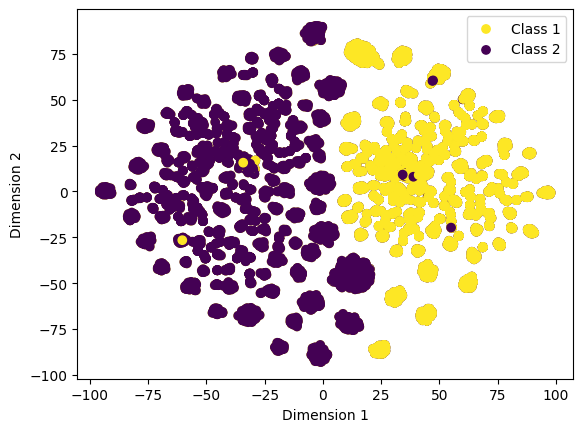

In [7]:
plt.scatter(df_embedded['Dimension 1'], df_embedded['Dimension 2'], c=df_embedded['Class 1'])
plt.scatter(df_embedded['Dimension 1'], df_embedded['Dimension 2'], c=df_embedded['Class 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(['Class 1', 'Class 2'])
plt.show()

In [8]:
import json

# Read JSON file
with open('/content/drive/MyDrive/NLPPROJECT/EpochLogging/TrainLosses.json') as file:
    new_dict = json.load(file)

In [9]:
new_dict

{'St_Mul_L': [0.5634242229091625,
  0.6157822200826959,
  0.6246869173092816,
  0.6297747625272024,
  0.6333443863541344,
  0.636529873519692,
  0.6397006917651786,
  0.6384736323831746,
  0.6394402317201364,
  0.6411428595722023,
  0.6420658774851827,
  0.6413324120937467,
  0.6427871165455589,
  0.6421460684912118,
  0.6403296947485209,
  0.6430869017059837,
  0.6422255803220303,
  0.6438900909928381,
  0.6436311730415367,
  0.6435289824212107],
 'Co_Mul_L': [0.00023126860308796438,
  0.00023108404744512235,
  0.00023108405135454052,
  0.00023108405324942857,
  0.00023108405251463527,
  0.00023108405292884859,
  0.00023108405278028023,
  0.00023108405393118753,
  0.00023108405279594917,
  0.00023108405331329925,
  0.00023108405393976227,
  0.00023108405302651346,
  0.00023108405380431666,
  0.0002310840538858737,
  0.00023108405288842527,
  0.00023108405389676934,
  0.00023108405436585077,
  0.00023108405260255588,
  0.0002310840545488523,
  0.00023108405413041028],
 'St_Adv_L': [0.3

In [10]:
keys_to_extract = ['Recon_L','Over_L']

# New dictionary with extracted keys
data = {key: new_dict[key] for key in keys_to_extract}
data

{'Recon_L': [2.993413039842735,
  1.9812532854638794,
  1.6996854068252218,
  1.5409964776681853,
  1.4411896457110984,
  1.3712817226968692,
  1.3178525667224261,
  1.2758748178426875,
  1.400752961620996,
  1.2182879696355426,
  1.198702981387044,
  1.179954230146531,
  1.1641660594905994,
  1.1584722862965722,
  1.1346417561750555,
  1.1219688006334003,
  1.1118567117538996,
  1.110542890537393,
  1.0925816913841913,
  1.1058281892369293],
 'Over_L': [5.544845476312023,
  4.234389401323729,
  3.8831371858103836,
  3.6848479447997606,
  3.549323347668463,
  3.458006408019494,
  3.3842209525317446,
  3.318698478623332,
  3.427572142262064,
  3.2283780205781345,
  3.2013531918092264,
  3.174057116139804,
  3.153135788107317,
  3.139229667591445,
  3.1106675150877474,
  3.091556753345222,
  3.0776923588279983,
  3.0763025688747634,
  3.0553066557174624,
  3.0614849329953553]}

In [11]:
keys_to_extract = ['St_Mul_L','Co_Mul_L','St_Adv_L','Co_Adv_L','St_Ent','Co_Ent','St_Mul_','St_Adv_Acc']

# New dictionary with extracted keys
data = {key: new_dict[key] for key in keys_to_extract}
data

{'St_Mul_L': [0.5634242229091625,
  0.6157822200826959,
  0.6246869173092816,
  0.6297747625272024,
  0.6333443863541344,
  0.636529873519692,
  0.6397006917651786,
  0.6384736323831746,
  0.6394402317201364,
  0.6411428595722023,
  0.6420658774851827,
  0.6413324120937467,
  0.6427871165455589,
  0.6421460684912118,
  0.6403296947485209,
  0.6430869017059837,
  0.6422255803220303,
  0.6438900909928381,
  0.6436311730415367,
  0.6435289824212107],
 'Co_Mul_L': [0.00023126860308796438,
  0.00023108404744512235,
  0.00023108405135454052,
  0.00023108405324942857,
  0.00023108405251463527,
  0.00023108405292884859,
  0.00023108405278028023,
  0.00023108405393118753,
  0.00023108405279594917,
  0.00023108405331329925,
  0.00023108405393976227,
  0.00023108405302651346,
  0.00023108405380431666,
  0.0002310840538858737,
  0.00023108405288842527,
  0.00023108405389676934,
  0.00023108405436585077,
  0.00023108405260255588,
  0.0002310840545488523,
  0.00023108405413041028],
 'St_Adv_L': [0.3

['St_Mul_L', 'Co_Mul_L', 'St_Adv_L', 'Co_Adv_L', 'St_Ent', 'Co_Ent', 'St_Mul_', 'St_Adv_Acc']
[[0.5634242229091625, 0.6157822200826959, 0.6246869173092816, 0.6297747625272024, 0.6333443863541344, 0.636529873519692, 0.6397006917651786, 0.6384736323831746, 0.6394402317201364, 0.6411428595722023, 0.6420658774851827, 0.6413324120937467, 0.6427871165455589, 0.6421460684912118, 0.6403296947485209, 0.6430869017059837, 0.6422255803220303, 0.6438900909928381, 0.6436311730415367, 0.6435289824212107], [0.00023126860308796438, 0.00023108404744512235, 0.00023108405135454052, 0.00023108405324942857, 0.00023108405251463527, 0.00023108405292884859, 0.00023108405278028023, 0.00023108405393118753, 0.00023108405279594917, 0.00023108405331329925, 0.00023108405393976227, 0.00023108405302651346, 0.00023108405380431666, 0.0002310840538858737, 0.00023108405288842527, 0.00023108405389676934, 0.00023108405436585077, 0.00023108405260255588, 0.0002310840545488523, 0.00023108405413041028], [0.3452432245116604, 0.3

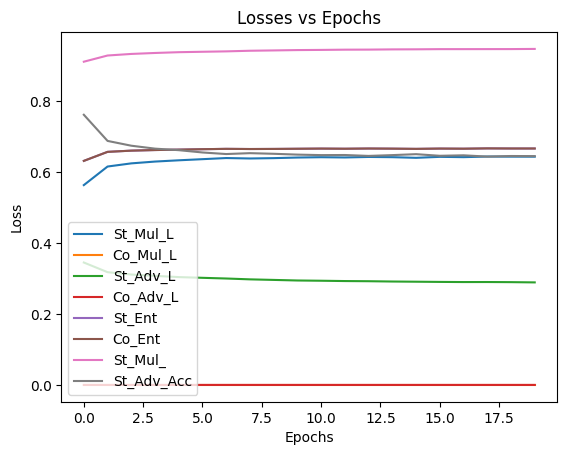

In [12]:
import matplotlib.pyplot as plt

x_keys = list(data.keys())  # Assuming the keys are the x-axis values
y_values = list(data.values())  # Assuming the values are the y-axis values
print(x_keys)
print(y_values)

for x_key, y_values in data.items():
    plt.plot(y_values, label=x_key)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses vs Epochs')
plt.legend(list(data.keys()))
plt.savefig('loss.png')
plt.show()